In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os

C:\Users\USER\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.GK7GX5KEQ4F6UYO3P26ULGBQYHGQO7J4.gfortran-win_amd64.dll
C:\Users\USER\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


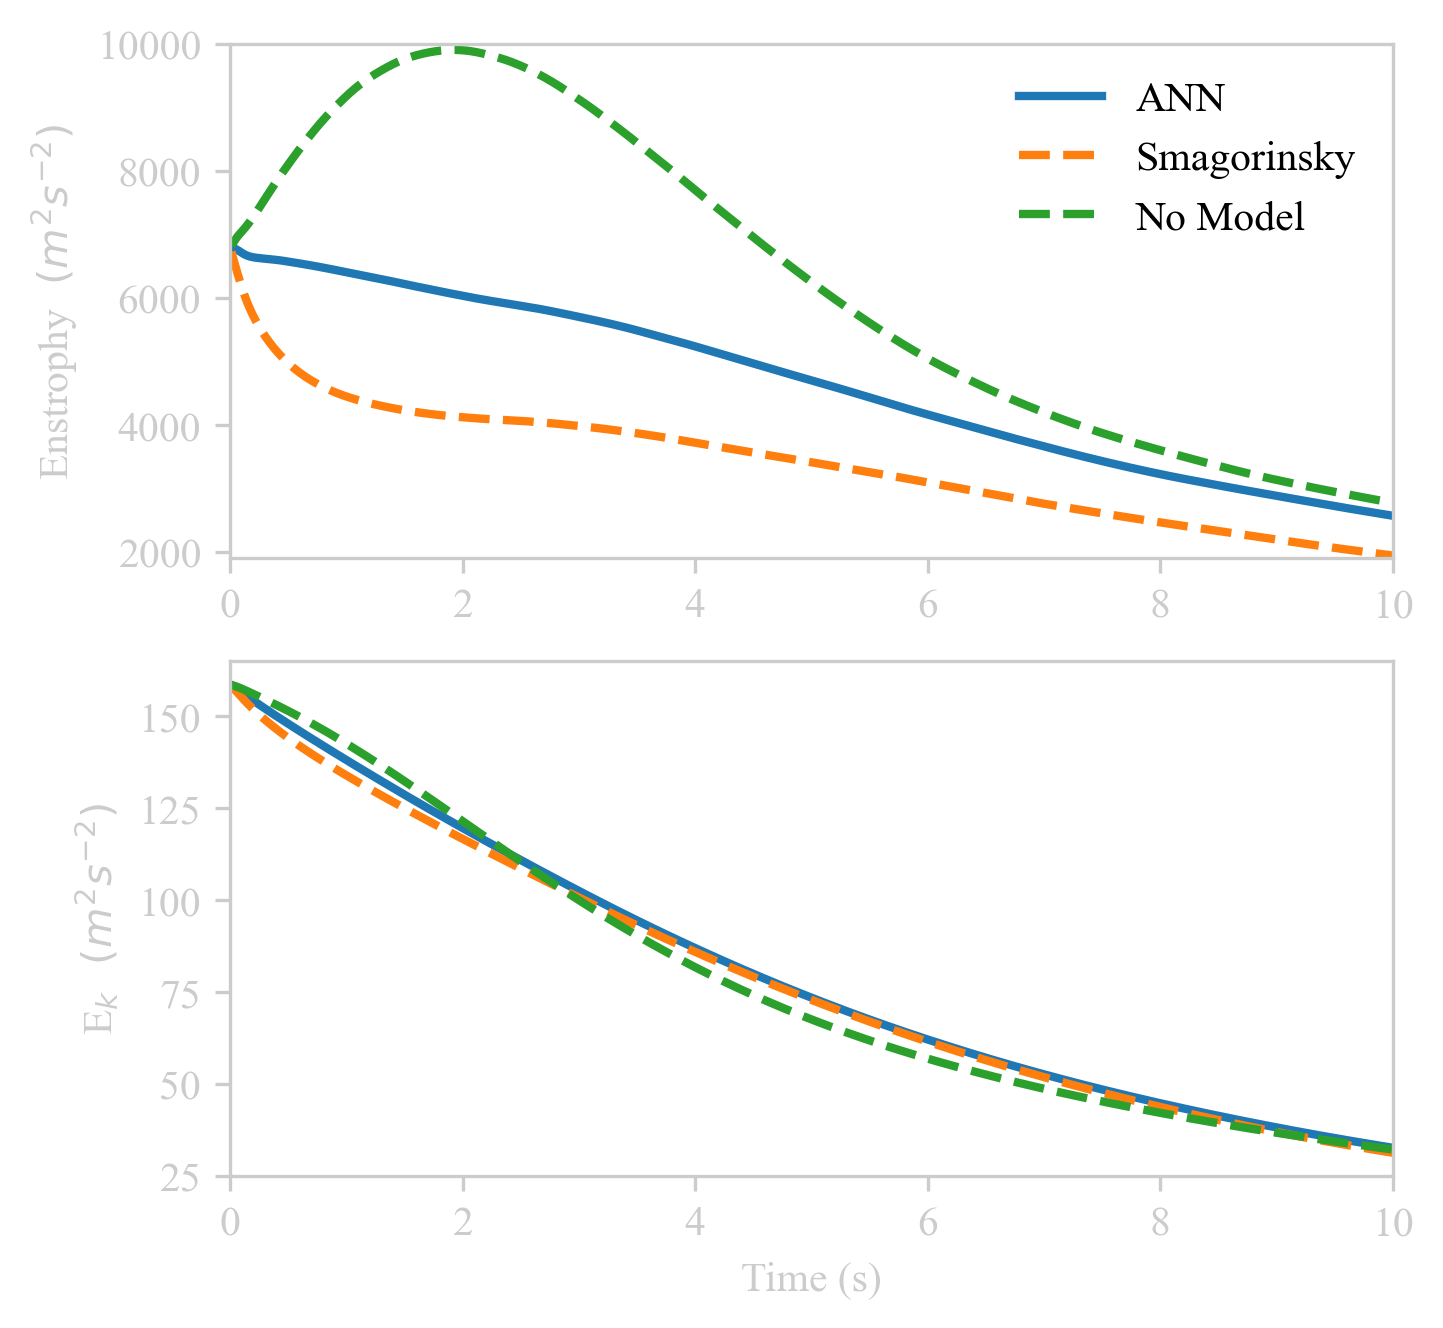

In [28]:
wsl_openfoam_directory = r"C:\Users\USER\AppData\Local\Packages\CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc\LocalState\rootfs\home\george\OpenFOAM"
DIT_directory = r"\george-v2006\FYPDecayIsoTurb"
# file_directory = r"\postProcessing\integralQuantities\0\volFieldValue.dat"

plt.rcParams["font.family"] = "Times New Roman"

mpl.rcParams['figure.dpi'] = 300
fig, (ax1, ax2) = plt.subplots(2,1,figsize = (5,5))#, sharex=True)

# case_directory = r"\FYPDIT014"
# case_directories = 
labelss = ["ANN", "Smagorinsky", "No Model"]
cases = [r"\FYPDIT020", r"\FYPDIT016", r"\FYPDIT019"]

for i in range(len(cases)):
    case_directory = cases[i]
    file_directory = r"\postProcessing\integralQuantities\0\volFieldValue.dat"
    if case_directory == r"\FYPDIT024":
        file_directory = r"\postProcessing\integralQuantities\0\volFieldValue_0.dat"
    
    full_directory = wsl_openfoam_directory + DIT_directory + case_directory + file_directory
    data = np.loadtxt(full_directory)

    time = data[:,0]
    enstrophy = data[:,1]
    e_k = 0.5 * data[:,2]
    
#     label_text = case_directory[-2:]
    if i == 1 or i == 2:
        ax1.plot(time, enstrophy, '--', linewidth = 2, label=labelss[i])
        ax2.plot(time, e_k, '--', linewidth = 2)
    else:
        ax1.plot(time, enstrophy, linewidth = 2, label=labelss[i])
        ax2.plot(time, e_k, linewidth = 2)

ax1.set_ylabel(r"Enstrophy $\ (m^{2}s^{-2})$")
ax2.set_ylabel(r"E$_k \ \ (m^{2}s^{-2})$")
ax1.set_ylim(1900, 10000)

ax2.set_xlabel("Time (s)")
ax2.set_xlim(0, 10)
ax1.set_xlim(0, 10)

leg = ax1.legend(frameon=False,loc='upper right')

ax1.spines['bottom'].set_color('0.8')
ax1.spines['top'].set_color('0.8')
ax1.spines['left'].set_color('0.8')
ax1.spines['right'].set_color('0.8')
ax1.xaxis.label.set_color('0.8')
ax1.tick_params(axis='x', colors='0.8')
ax1.yaxis.label.set_color('0.8')
ax1.tick_params(axis='y', colors='0.8')

ax2.spines['bottom'].set_color('0.8')
ax2.spines['top'].set_color('0.8')
ax2.spines['left'].set_color('0.8')
ax2.spines['right'].set_color('0.8')
ax2.xaxis.label.set_color('0.8')
ax2.tick_params(axis='x', colors='0.8')
ax2.yaxis.label.set_color('0.8')
ax2.tick_params(axis='y', colors='0.8')


# plt.setp(leg.get_texts(), color='w')

# ax1.set_ylim(0,max(data[:,1]))
# ax1.set_ylim(0,max(data[:,2]))

# ticks = np.arange(0, epoch_number+1, 2)
# print(ticks)
# ticks = np.append(ticks, epoch_number)
# ticks = np.array([y for y in ticks if y != 0])
# ticks = np.insert(ticks, 0, 1)
# print(ticks)
# ax.set_xticks(ticks = ticks)

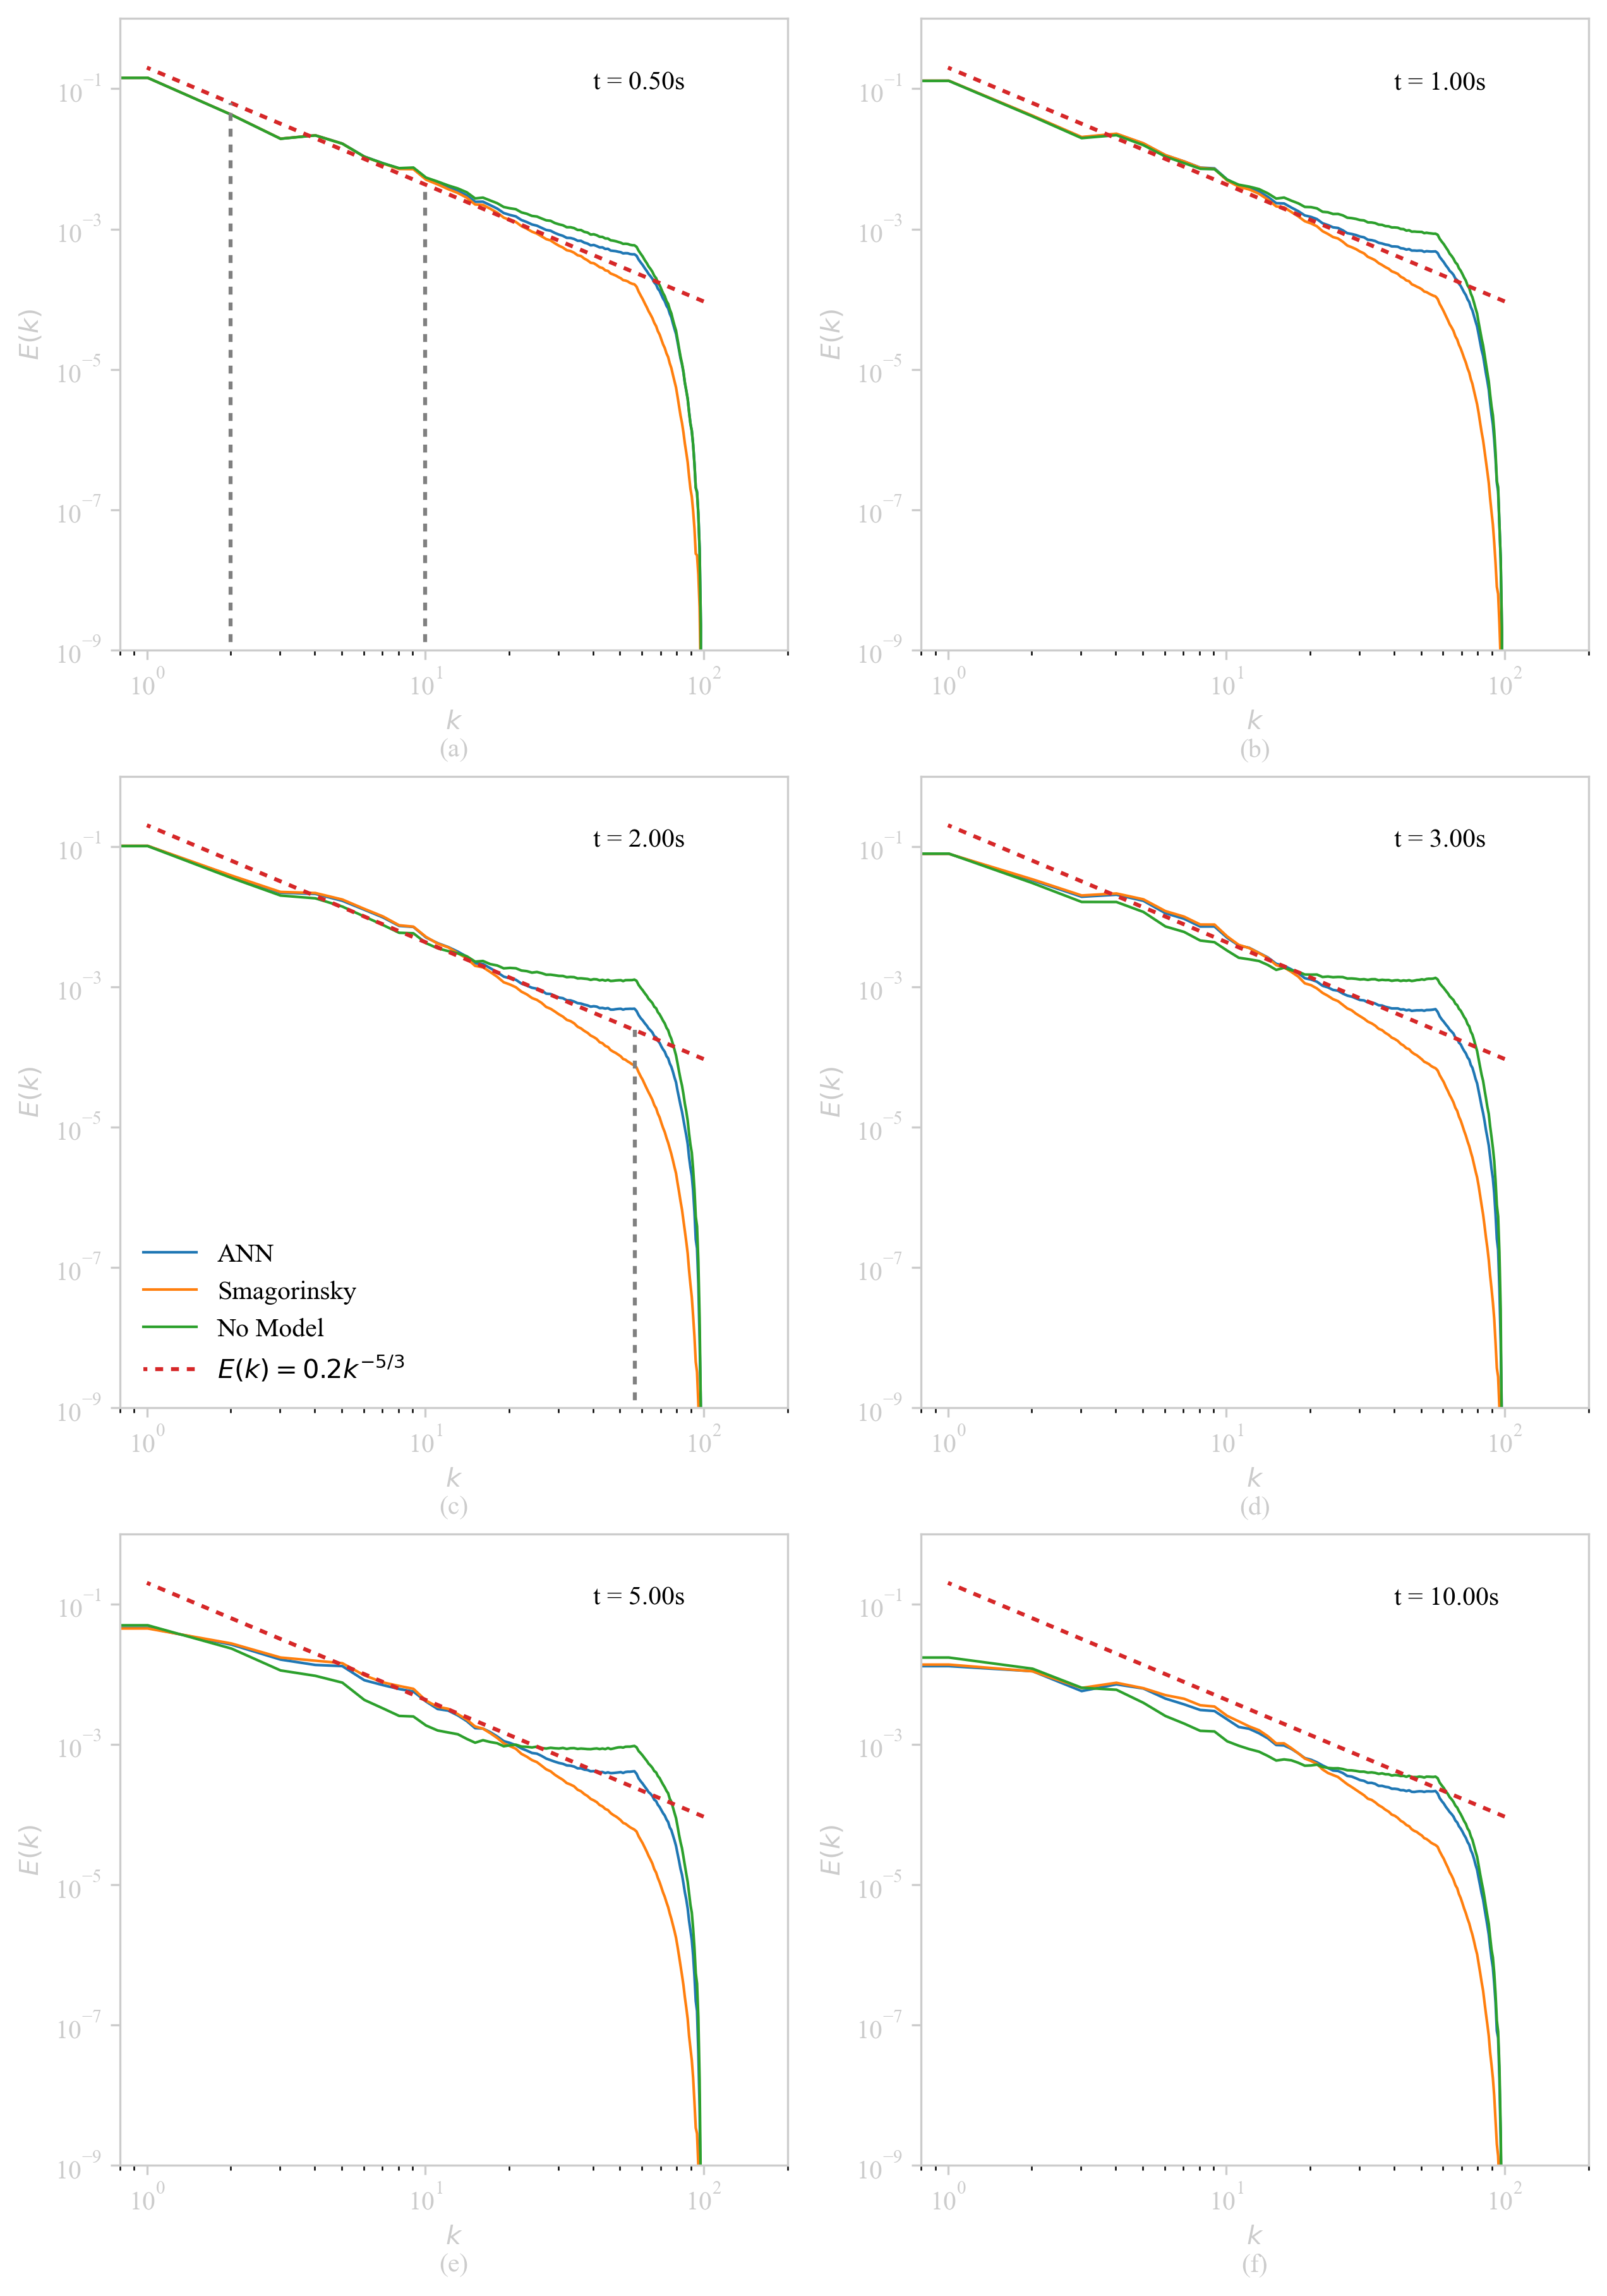

In [26]:
mpl.rcParams['figure.dpi'] = 300

energies_folder = r"\postProcessing\energySpectrum1"

labelss = ["ANN", "Smagorinsky", "No Model"]
cases = [r"\FYPDIT020", r"\FYPDIT016", r"\FYPDIT019"]
# timesteps = [0.01,0.5,2,3,5,10]
# letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
timesteps = [0.5,1,2,3,5,10]
letters = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]

columns = 2
rows = int(len(timesteps) / columns)
fig, axs = plt.subplots(rows, columns, figsize = (5*columns,5*rows))

fivethirds_x = np.linspace(10e-1,10e1,5);
fivethirds_y = 0.2*fivethirds_x**(-5/3);

for j in range(len(timesteps)):
    timestep = timesteps[j]

    first_ax_index = int(np.floor(j / columns))
    second_ax_index = int(j % columns)
    ax = axs[first_ax_index, second_ax_index]
    
    for i in range(len(cases)):
        case_directory = cases[i]
        energies_directory = wsl_openfoam_directory + DIT_directory + case_directory + energies_folder
        full_directory = energies_directory + r"/" + str(timestep) + r"/energySpectrum1.dat"
#         print(full_directory)
        data=np.loadtxt(full_directory)
    
        ax.loglog(data[:,0], data[:,1], alpha=1, linewidth = 1, label = labelss[i])
        
    ax.loglog(fivethirds_x, fivethirds_y, label = r"$E(k) = 0.2k^{-5/3}$", linestyle=(1, (2, 2)))
    x_label_string = "$k$\n" + letters[j]
    ax.set_xlabel(x_label_string)
    ax.set_ylabel("$E(k)$")
    time_string = "t = " + '%.2f' % timestep + "s"
    ax.text(40, 0.1, time_string)
    
    ax.spines['bottom'].set_color('0.8')
    ax.spines['top'].set_color('0.8')
    ax.spines['left'].set_color('0.8')
    ax.spines['right'].set_color('0.8')
    ax.xaxis.label.set_color('0.8')
    ax.tick_params(axis='x', colors='0.8')
    ax.yaxis.label.set_color('0.8')
    ax.tick_params(axis='y', colors='0.8')
    
    ax.set_ylim([1e-9,1e0])
    ax.set_xlim(8e-1, 2e2)
    

    
axs[1,0].legend(frameon=False,loc='lower left')

cell_wavenumber_x_value = 56.5
cell_wavenumber_x = cell_wavenumber_x_value*np.array([1,1])
cell_wavenumber_max_y = 0.2*cell_wavenumber_x_value**(-5/3)
cell_wavenumber_y = np.array([0,cell_wavenumber_max_y])
axs[1,0].plot(cell_wavenumber_x, cell_wavenumber_y, linestyle=(1, (2, 2)), color = "grey")

cell_wavenumber_x_value = 2
cell_wavenumber_x = cell_wavenumber_x_value*np.array([1,1])
cell_wavenumber_max_y = 0.2*cell_wavenumber_x_value**(-5/3)
cell_wavenumber_y = np.array([0,cell_wavenumber_max_y])
axs[0,0].plot(cell_wavenumber_x, cell_wavenumber_y, linestyle=(1, (2, 2)), color = "grey")

cell_wavenumber_x_value = 10
cell_wavenumber_x = cell_wavenumber_x_value*np.array([1,1])
cell_wavenumber_max_y = 0.2*cell_wavenumber_x_value**(-5/3)
cell_wavenumber_y = np.array([0,cell_wavenumber_max_y])
axs[0,0].plot(cell_wavenumber_x, cell_wavenumber_y, linestyle=(1, (2, 2)), color = "grey")

# axs[0,0].text(cell_wavenumber_x_value, -1, "56.5")

C:\Users\USER\AppData\Local\Packages\CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc\LocalState\rootfs\home\george\OpenFOAM\george-v2006\FYPDecayIsoTurb\FYPDIT016\postProcessing\energySpectrum1\2\energySpectrum1.dat


OSError: C:\Users\USER\AppData\Local\Packages\CanonicalGroupLimited.UbuntuonWindows_79rhkp1fndgsc\LocalState\rootfs\home\george\OpenFOAM\george-v2006\FYPDecayIsoTurb\FYPDIT016\postProcessing\energySpectrum1/2/energyspectrum1.dat not found.

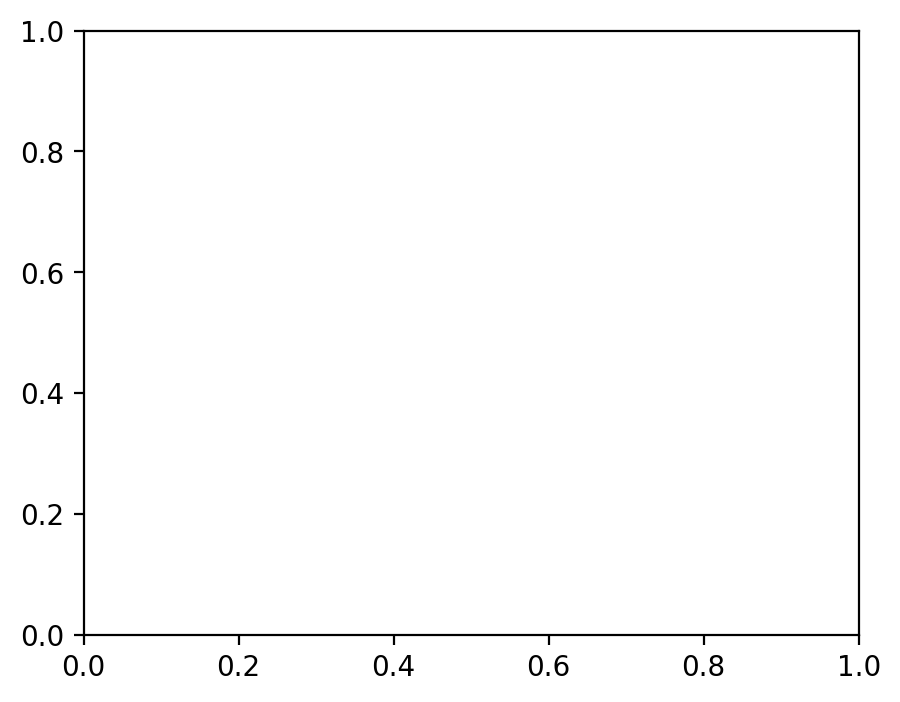

In [50]:
mpl.rcParams['figure.dpi'] = 200
energies_folder = r"\postProcessing\energySpectrum1"
fig, ax = plt.subplots(figsize = (5,4))

for case_directory in [r"\FYPDIT016"]:
    energies_directory = wsl_openfoam_directory + DIT_directory + case_directory + energies_folder
    
    timesteps = [r"\2"]
    for timestep in timesteps:
        file_directory = energies_directory + timestep + r"\energySpectrum1.dat"
        
    print(file_directory)
    data = np.loadtxt(full_directory)
    print(data)
    